<a href="https://colab.research.google.com/github/BrithneyHernandez25/BrithneyHernandez.github.io/blob/main/Tesis_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

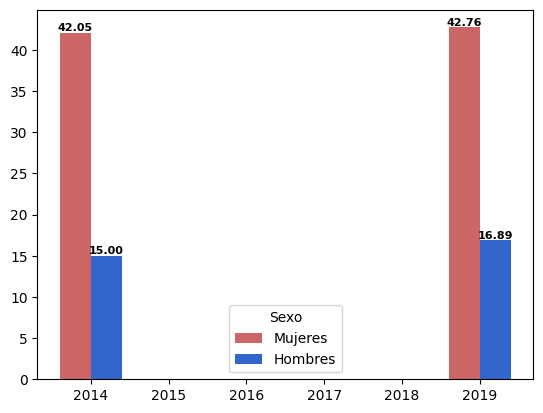

<Figure size 640x480 with 0 Axes>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

datos=pd.read_excel("/content/Tiempo de trabajo no remunerado.xlsx")
datos=datos[(datos["grupos de edad__tiempo"]=="Total") & (datos["Tipos de trabajo"]=="Tiempo trabajo no remunerado")]
datos = datos.pivot_table(index="Años__ESTANDAR",columns="Sexo__población", values="value",fill_value=0)
bars=plt.bar(datos.index -0.2,datos["Mujeres"],label="Mujeres",width=0.4, color='#cc6666')
bars2=plt.bar(datos.index +0.2,datos["Hombres"],label="Hombres",width=0.4, color='#3366cc')

plt.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=8,rotation=0,fontproperties=FontProperties(weight='bold'))
plt.bar_label(bars2, fmt='%.2f', label_type='edge', color='black', fontsize=8,rotation=0,fontproperties=FontProperties(weight='bold'))

plt.legend(title="Sexo")
plt.show()
plt.savefig("Imagen.jpg")

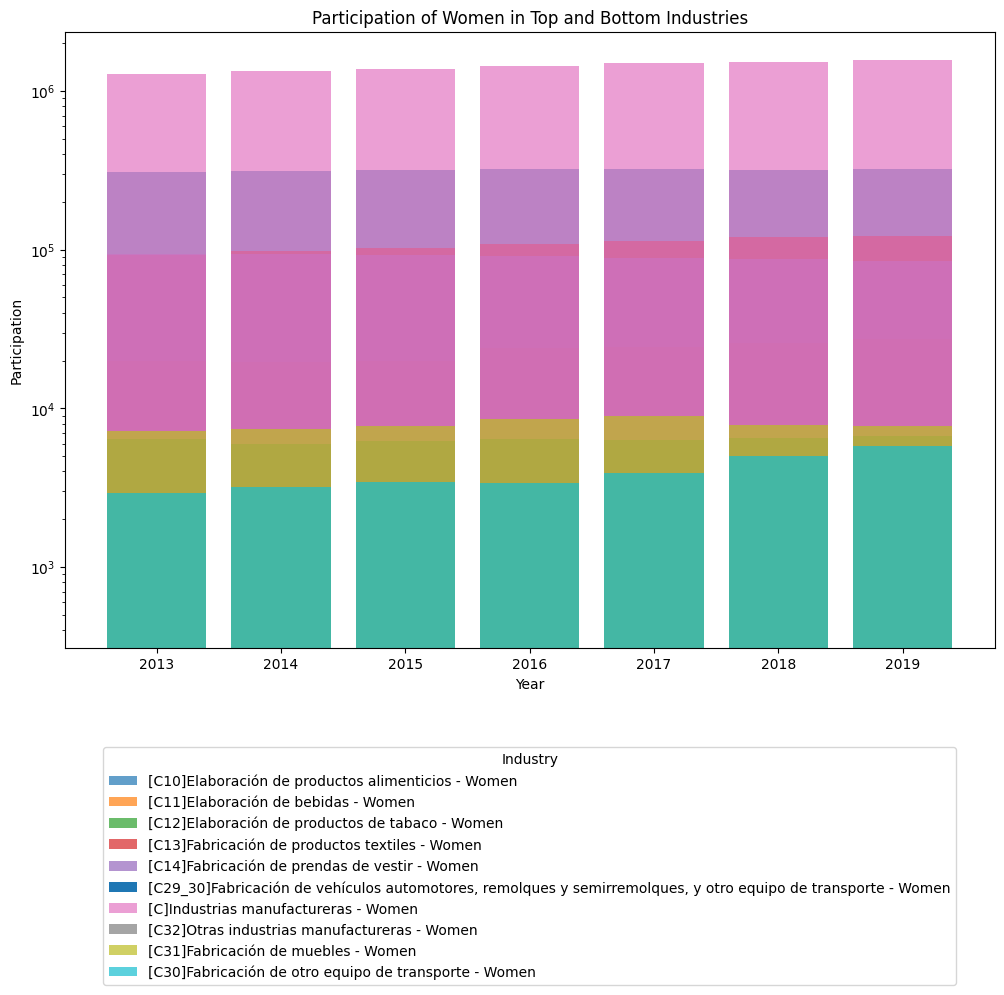

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos_m = pd.read_excel("/content/datos_actividad_economica_por_sexo.xlsx")
datos_remuneraciones = pd.read_excel("/content/remuneraciones_actividad.xlsx")
datos_remuneraciones['value'] = sorted(datos_remuneraciones['value'], reverse=True)

industrias_top5 = datos_remuneraciones.groupby("Actividad Económica")["value"].sum().nlargest(5).index
industrias_bottom5 = datos_remuneraciones.groupby("Actividad Económica")["value"].sum().nsmallest(5).index

# Filter top and bottom industries from datos_m
datos_m_top5 = datos_m[datos_m["Actividad Económica"].isin(industrias_top5)]
datos_m_bottom5 = datos_m[datos_m["Actividad Económica"].isin(industrias_bottom5)]

# Plotting stacked bar chart
plt.figure(figsize=(12, 8))

# Stacked bar chart for top industries
for industria in industrias_top5:
    data = datos_m_top5[datos_m_top5["Actividad Económica"] == industria]
    plt.bar(data["Años__ESTANDAR"], data["value"], label=f'{industria} - Women', alpha=0.7)

# Stacked bar chart for bottom industries
for industria in industrias_bottom5:
    data = datos_m_bottom5[datos_m_bottom5["Actividad Económica"] == industria]
    plt.bar(data["Años__ESTANDAR"], data["value"], label=f'{industria} - Women', alpha=0.7)

plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Participation')
plt.title('Participation of Women in Top and Bottom Industries')
plt.legend(title='Industry', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=1)
plt.savefig("Participation_Graph.png")
plt.show()


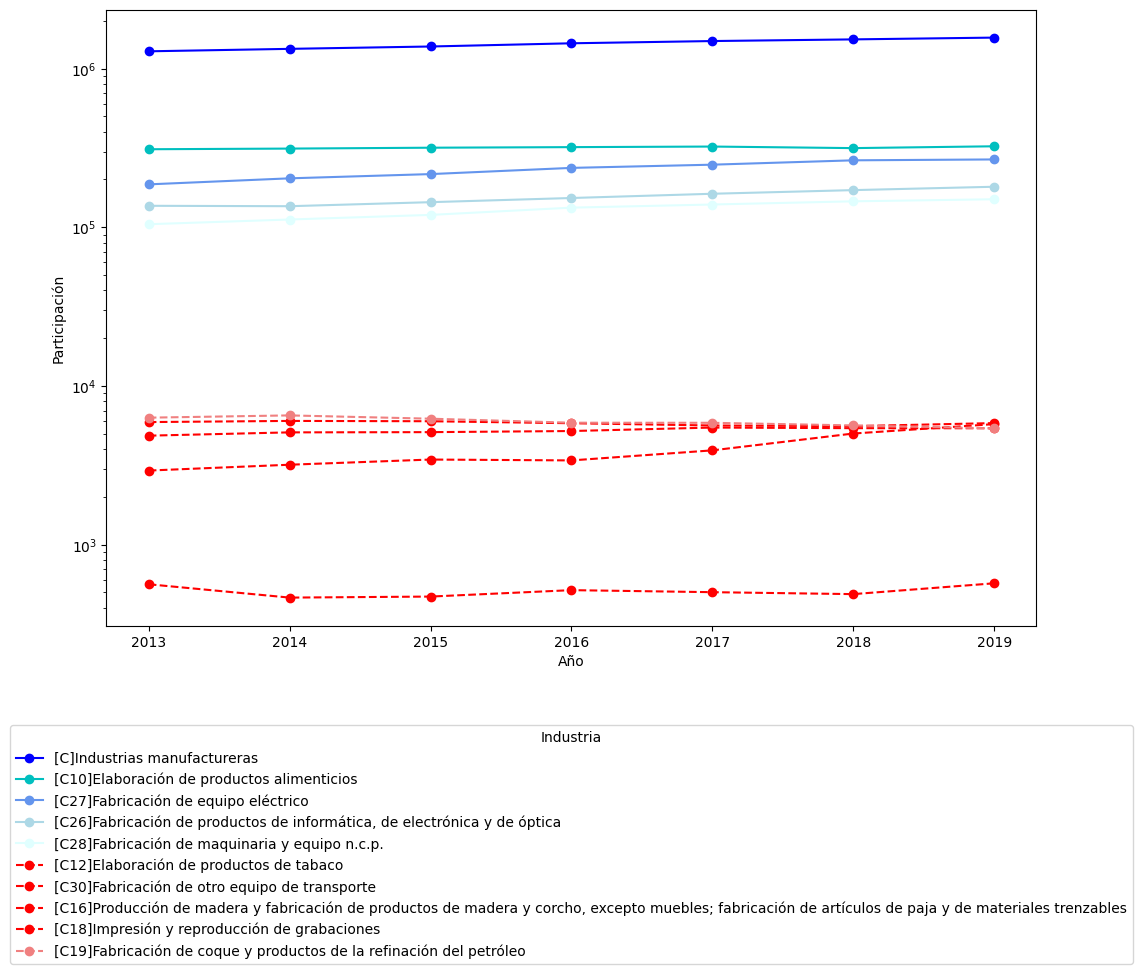